In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../../data/processed/avocado_cleaned_normalized.csv")

print("Dimensiones del dataset:", data.shape)
data.head() 

Dimensiones del dataset: (6725, 66)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,0.000000,0.344633,0.327394,0.007284,0.389698,0.042863,0.313010,0.356248,0.017721,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.019231,0.355932,0.279628,0.004737,0.319451,0.051914,0.342115,0.389557,0.018526,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.038462,0.118644,0.602895,0.005583,0.781114,0.116147,0.293160,0.333001,0.019600,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.057692,0.203390,0.402698,0.007953,0.515089,0.064597,0.209150,0.235082,0.025419,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.076923,0.316384,0.260045,0.006615,0.313723,0.067445,0.222567,0.247871,0.037568,0.0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Separamos las variables predictoras y la variable objetivo
X = data.drop("AveragePrice", axis=1)
y = data["AveragePrice"]

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (5380, 65)
Tamaño del conjunto de prueba: (1345, 65)


In [6]:
# crear y entrenar el modelo de red neuronal
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 64),   # dos capas ocultas con 64 neuronas cada una
    activation='relu',             # función de activación ReLU
    solver='adam',                 # optimizador
    max_iter=500,                  # número máximo de iteraciones
    random_state=42
)

print("Entrenando el modelo...")
mlp.fit(X_train, y_train)

Entrenando el modelo...


,loss,'squared_error'
,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True


In [7]:
# Realizar predicciones
y_pred = mlp.predict(X_test)

In [8]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nResultados del modelo MLPRegressor:")
print(f"  - MSE (Error cuadrático medio): {mse:.4f}")
print(f"  - R² (Coeficiente de determinación): {r2:.4f}")


Resultados del modelo MLPRegressor:
  - MSE (Error cuadrático medio): 0.0069
  - R² (Coeficiente de determinación): 0.7654


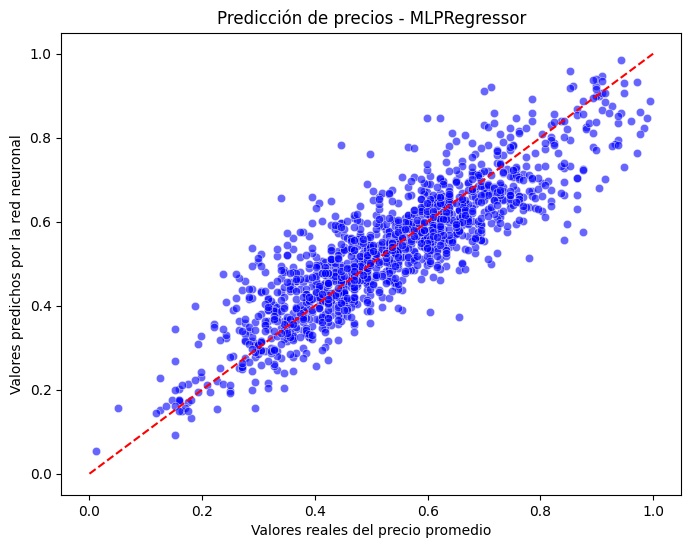

In [9]:
# Visu|alización de los resultados

# Comparación entre valores reales y predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.xlabel("Valores reales del precio promedio")
plt.ylabel("Valores predichos por la red neuronal")
plt.title("Predicción de precios - MLPRegressor")
plt.plot([0,1],[0,1],'--',color='red')  # línea de referencia ideal
plt.show()

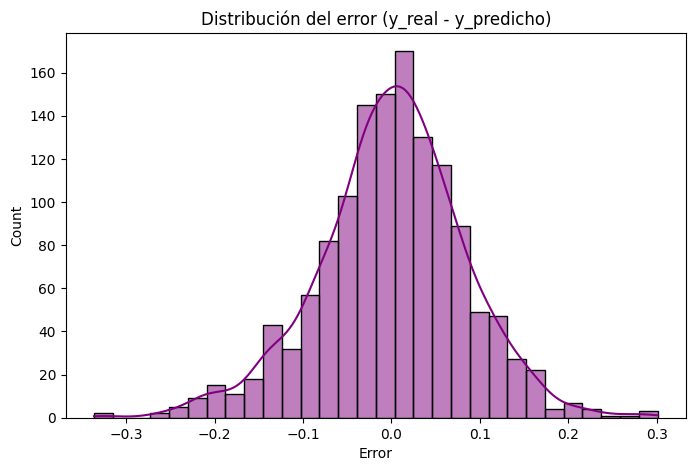

In [10]:
# visualización del error
error = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(error, bins=30, kde=True, color='purple')
plt.title("Distribución del error (y_real - y_predicho)")
plt.xlabel("Error")
plt.show()

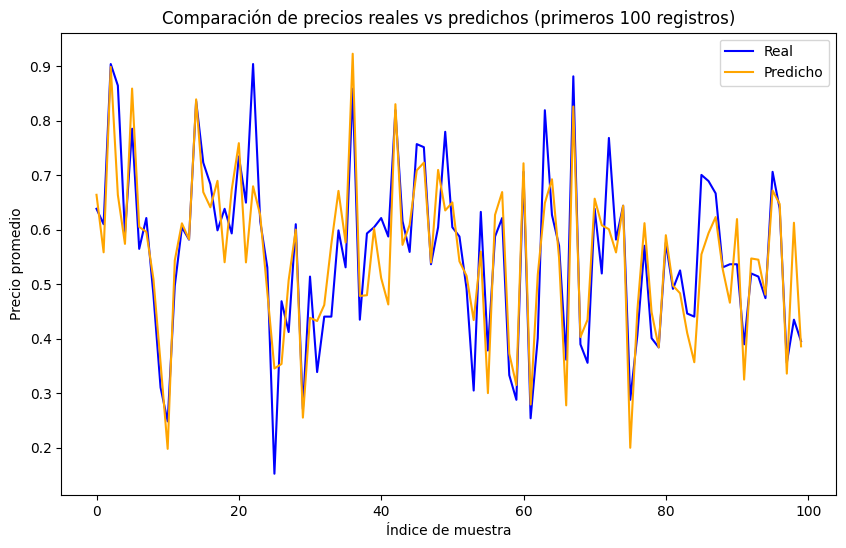

In [16]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label='Real', color='blue')
plt.plot(y_pred[:100], label='Predicho', color='orange')
plt.title("Comparación de precios reales vs predichos (primeros 100 registros)")
plt.xlabel("Índice de muestra")
plt.ylabel("Precio promedio")
plt.legend()
plt.show()


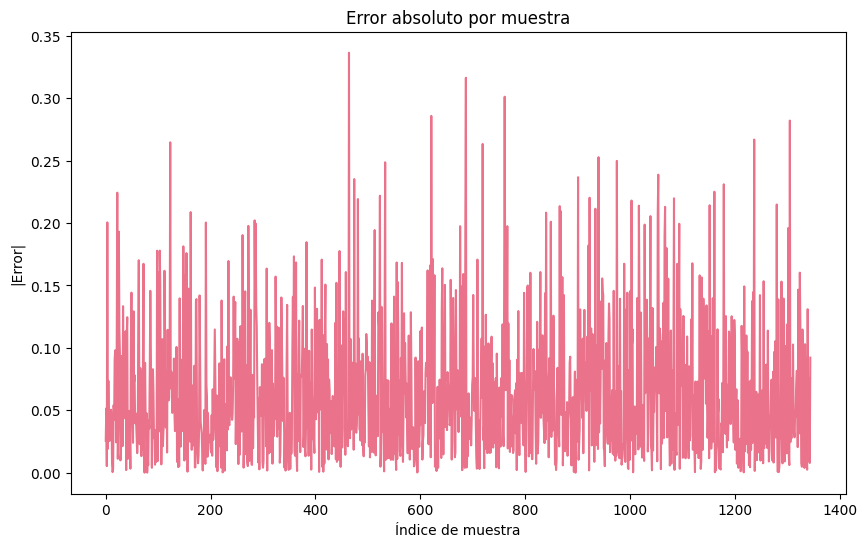

In [13]:
plt.figure(figsize=(10,6))
plt.plot(abs(error.values), color='crimson', alpha=0.6)
plt.title("Error absoluto por muestra")
plt.xlabel("Índice de muestra")
plt.ylabel("|Error|")
plt.show()

